**CS596 - Machine Learning**
<br>
Date: **18 November 2020**


Title: **Seminar 9**
<br>
Speaker: **Dr. Shota Tsiskaridze**
<br>
Teaching Assistant: **Levan Sanadiradze**

Sources:
https://scikit-learn.org/stable/modules/svm.html

<h1 align="center">Support Vector Machines</h1>

- **Support Vector Machines** (SVMs) are a particularly powerful and flexible class of supervised algorithms for both classification and regression.


- As an example of this, lets consider the simple case of a classification task, in which the **two classes** of points are well separated:

In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

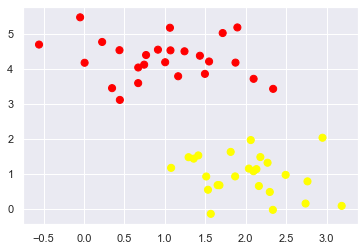

In [25]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

- A **linear discriminative classifier** would attempt to **draw a straight line** separating the two sets of data, and thereby create a model for classification. 


- For **two dimensional data**, this is a task we could do by hand. 


- But immediately we see a problem: there is more than one possible dividing line that can perfectly discriminate between the two classes!


- We can draw them as follows:

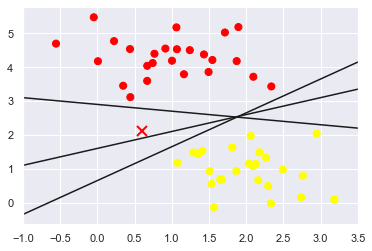

In [26]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

- These are **three very different separators** which, nevertheless, perfectly discriminate between these samples.


- Depending on which you choose, a **new data point** $X$ will be assigned a **different label**! 


- Evidently our simple intuition of **drawing a line between classes** is not enough, and we need to think a bit deeper.

<h3 align="center"> Maximizing the Margin</h3>

- **Support Vector Machines (SVM)** offer one way to improve on this. 


- The intuition is this: rather than simply drawing a zero-width line between the classes, we can **draw** around each line a **margin** of some **width**, **up to the nearest point**. 

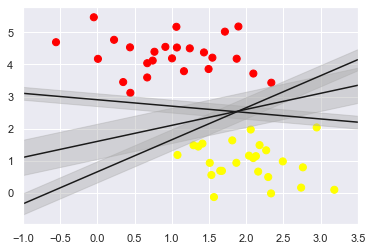

In [27]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

- In **support vector machines**, the **line that maximizes this margin** is the one we will choose as the **optimal model**.


- **Support vector machines** are an **example** of such a **maximum margin estimator**.

<h3 align="center">Fitting a SVM</h3>

- Let's see the result of an actual fit to this data.


- We will use **Scikit-Learn**'s support vector classifier to **train** an **SVM model** on this data. 

In [28]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

- To better **visualize** what's happening here, let's create a quick convenience function that will plot SVM decision boundaries for us.

In [29]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

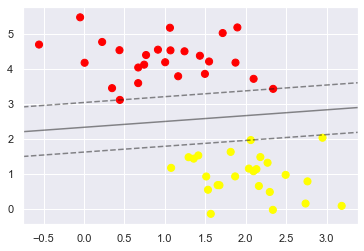

In [30]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

- This is the dividing line that **maximizes the margin** between the two sets of points. 


- Notice that a **few of the training points** just **touch the margin**.


- In **Scikit-Learn**, the identity of **these points are stored** in the **support_vectors_** attribute of the classifier:

In [39]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

- A **key** to this **classifier's success** is that for the fit, **only the position of the support vectors matter**; 


- Any points further from the margin which are on the correct side do not modify the fit! 


- Technically, this is because these points do not contribute to the loss function used to fit the model.




- We can see this, for example, if we plot the model learned from the first $60$ **points** and first $120$ **points** of this dataset.

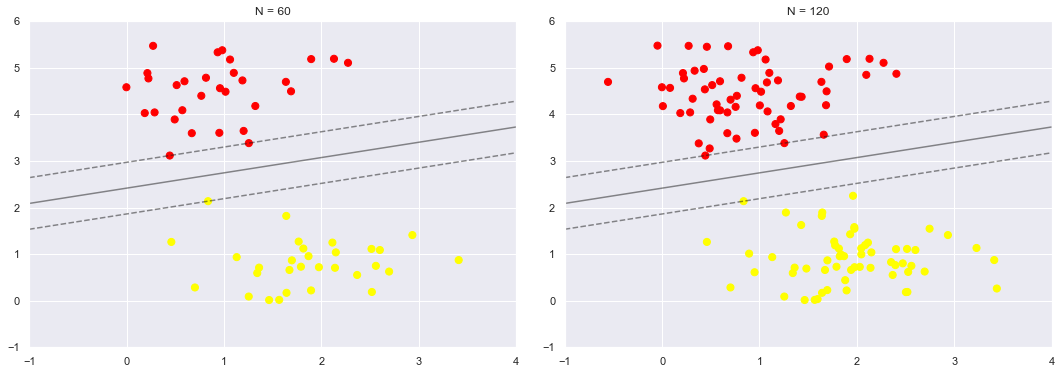

In [32]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

- In the **left plot**, we see the model and the support vectors for $60$ **training points**. 

- In the **right plot**, we have **doubled the number** of **training points**, but the **model has not changed**: the three support vectors from the left panel are still the support vectors from the right panel. 


- This insensitivity to the exact behavior of distant points is one of the strengths of the SVM model.

- We can use **IPython's interactive widgets** to view this feature of the SVM model interactively:

In [43]:
from ipywidgets import interact, fixed
Npoints = []
for i in range(1,10): Npoints.append(int(i*10))
interact(plot_svm, N=Npoints, ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 20, 30, 40, 50, 60, 70, 80, 90), value=10), Outpu…

<h3 align="center">Kernel SVM</h3>

- Where SVM becomes extremely powerful is when it is combined with kernels. 


- We have seen a version of kernels before. 


- Let's projected our data into higher-dimensional space defined by polynomials and Gaussian basis functions, and thereby were able to fit for nonlinear relationships with a linear classifier.

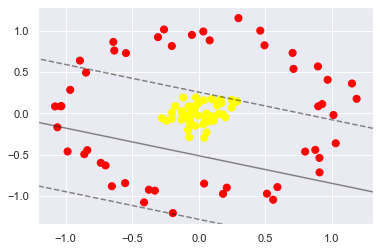

In [46]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

- It is clear that **no linear discrimination** will ever be able to **separate this data**. 


- But we can **project** the data into a **higher dimension** such that a **linear separator would be sufficient**. 


- For example, one **simple projection** we could use would be to compute a **radial basis function** centered on the middle clump:

In [47]:
r = np.exp(-(X ** 2).sum(1))

In [53]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[0, 30, 45, 90], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', index=1, options=(0, 30, 45, 90), value=30), IntSlider(valu…

- We can see that with this **additional dimensio**n, the **data** becomes trivially **linearly separable**.


- Here we **had to choos**e and **carefully tune our projection**: if we had not centered our radial basis function in the right location, we would not have seen such clean, linearly separable results. 


- In general, the need to **make such a choice is a problem**: we would like to somehow automatically **find the best basis functions** to use.


- One strategy to this end is to **compute a basis function** centered **at every point** in the dataset, and let the SVM algorithm **sift** through the results. 


- This **type** of **basis function transformation** is known as a **kernel transformation**, as it is based on a similarity relationship (or kernel) between each pair of points.



- A --potential problem-- with this strategy—projecting $N$ points into $N$ dimensions — is that it might become very **computationally intensive** as $N$ grows large. 


- However, because of a **neat little procedure** known as the **kernel trick**, a **fit on kernel-transformed data** can be done implicitly — that is, **without ever building the full $N$-dimensional representation of the kernel projection!**


- This **kernel trick** is built into the SVM, and is **one of the reasons the method is so powerful**.


- In **Scikit-Learn**, we can apply **kernelized SVM** simply by **changing our linear kernel** to an **Radial Basis Function (RBF) kernel**, using the kernel model hyperparameter:

In [54]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

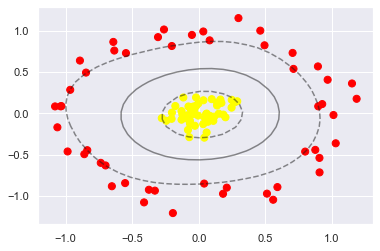

In [55]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

- This kernel transformation strategy is used often in machine learning to turn fast linear methods into fast nonlinear methods, especially for models in which the kernel trick can be used.

<h3 align="center">Softening Margins</h3>

- What if your **data** has some amount of overlap? For example, you may have data like this:

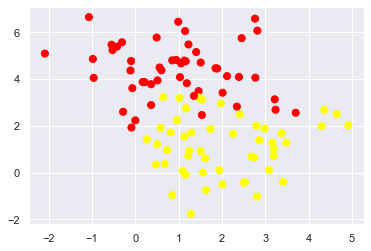

In [59]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

- To handle this case, the SVM implementation has a bit of a fudge-factor which **softens** the margin.


- It allows some of the points to creep into the margin if that allows a better fit. 


- The **hardness** of the margin is controlled by a **tuning parameter**, most often known as $C$. 


- For **very large** $C$, the **margin is hard**, and points cannot lie in it. 


- For **smaller** $C$, the **margin is softer**, and can grow to encompass some points.


- The plot shown below gives a visual picture of **how** a **changing** $C$ parameter **affects the final fit**, via the softening of the margin:

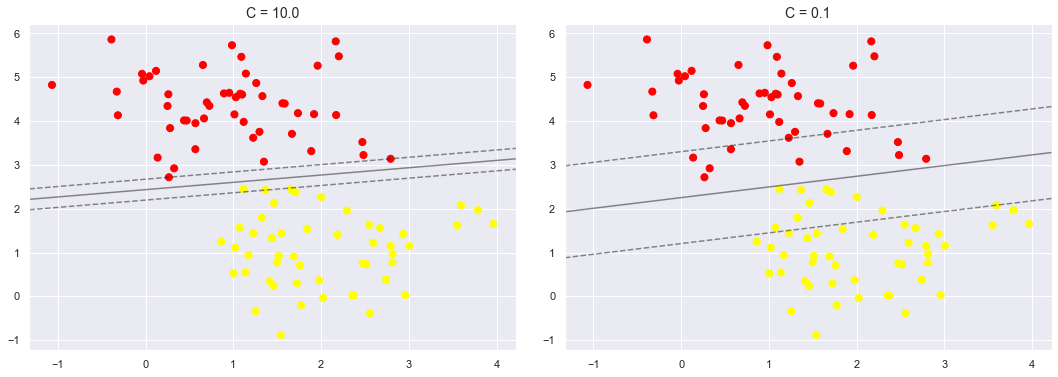

In [60]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

- The **optimal value** of the $C$ **parameter** will **depend on dataset**, and should be tuned using cross-validation or a similar procedure.

<h1 align="center">End of Seminar</h1>